# Predicting Number of Comments for Blogs ##

In this assignment, we will work on blog posts. The deadline is ** Nov. 19 5pm **. The goal is to determine the number of comments a post will receive in the next 24 hours. You can find the details of the dataset [here](https://drive.google.com/a/bu.edu/file/d/19p7QBjH2Ai37MJcixiQ5UKlC0kw9l2Yd/view?usp=sharing). The data are stored in .csv files and each row of the dataset corresponds to a distinct blog (data instance). 

For information regarding the dataset and the features included in it please refer to the included README.md file.

As learned in class most algorithms can only handle numeric values so we provided a dataset containing numeric values. The algorithms you are going to evaluate are the following: 1) Linear Regression, 2) Logistic Regression, 3) KNN, 4) Decision Tree Classifiers. Tasks 1 and 2 are related to regression to analyze this information, while tasks 3 and 4 are related to classification.

Relevant Papers/citations:
1) Buza, K. (2014). Feedback Prediction for Blogs. In Data Analysis, Machine Learning and Knowledge Discovery (pp. 145-152). Springer International Publishing.
2) BlogFeedback Data Set UCI Machine Learning Repository

### Task 1

First, we will fit a linear regression model that predicts the number of comments a post will receive. Use the model to analyze the important factors that decide the number of comments of a blog. 

1. Report the results of your linear regression model (error, factors, e.t.c.) for the test datasets a) blogData_test-2012.02.csv b) blogData_test-2012.03.csv ** (10 points) **
2. Provide a brief report explaining a) how did you address overfitting, b) interpretation of the linear regression model results, c) compare the results for the two test datasets and mention any interesting observations ** (5 points) **

Total: ** (15 points) **


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import sklearn.datasets as ds
from sklearn import linear_model, datasets
from sklearn.linear_model import LinearRegression
import math
import warnings
warnings.filterwarnings("ignore")

In [5]:
traindata.head()

,0,1,3,4,5,6,8,9,10,11,...,48,50,51,53,54,55,56,58,60,280
0,40.30467,53.845657,401.0,15.0,15.52416,32.44188,377.0,3.0,14.044226,32.615417,...,9.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,10.0,1.0
1,40.30467,53.845657,401.0,15.0,15.52416,32.44188,377.0,3.0,14.044226,32.615417,...,9.0,6.0,2.0,5.0,-2.0,0.0,0.0,0.0,35.0,0.0
2,40.30467,53.845657,401.0,15.0,15.52416,32.44188,377.0,3.0,14.044226,32.615417,...,9.0,6.0,2.0,5.0,-2.0,0.0,0.0,0.0,35.0,0.0
3,40.30467,53.845657,401.0,15.0,15.52416,32.44188,377.0,3.0,14.044226,32.615417,...,9.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,10.0,1.0
4,40.30467,53.845657,401.0,15.0,15.52416,32.44188,377.0,3.0,14.044226,32.615417,...,9.0,3.0,1.0,2.0,-1.0,0.0,0.0,0.0,34.0,27.0


In [2]:
traindata = pd.read_csv("blogData_train.csv", header=-1)
data02 = pd.read_csv("blogData_test-2012.02.csv", header=-1)
data03 = pd.read_csv("blogData_test-2012.03.csv", header=-1)

correlation = np.corrcoef(traindata, rowvar=0)
#Delete columns that do not make the cutoff
i = 0
goodfeatures={}
for feature in correlation:
    #NOTE: 0.1 is the best cutoff for Linear Regression, gives us the highest accuracy store
    if(feature[280] > 0.15 or feature[280] < -0.15): 
        goodfeatures[i] = feature[280]
    else:
        traindata = traindata.drop([i], axis=1)
        data02 = data02.drop([i], axis=1)
    i += 1

ft = []
for feature in goodfeatures:
    ft.append(feature)

In [18]:
regr = linear_model.LinearRegression()
regr.fit(traindata[ft],traindata[280])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
lm = LinearRegression()
lm.fit(traindata[ft],traindata[280])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
traindata.head()

,0,1,3,4,5,6,8,9,10,11,...,48,50,51,53,54,55,56,58,60,280
0,40.30467,53.845657,401.0,15.0,15.52416,32.44188,377.0,3.0,14.044226,32.615417,...,9.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,10.0,1.0
1,40.30467,53.845657,401.0,15.0,15.52416,32.44188,377.0,3.0,14.044226,32.615417,...,9.0,6.0,2.0,5.0,-2.0,0.0,0.0,0.0,35.0,0.0
2,40.30467,53.845657,401.0,15.0,15.52416,32.44188,377.0,3.0,14.044226,32.615417,...,9.0,6.0,2.0,5.0,-2.0,0.0,0.0,0.0,35.0,0.0
3,40.30467,53.845657,401.0,15.0,15.52416,32.44188,377.0,3.0,14.044226,32.615417,...,9.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,10.0,1.0
4,40.30467,53.845657,401.0,15.0,15.52416,32.44188,377.0,3.0,14.044226,32.615417,...,9.0,3.0,1.0,2.0,-1.0,0.0,0.0,0.0,34.0,27.0


### Task 2

Next, we will fit a logistic regression model that decides if a blog post is popular or not. In order to do so, note that you need to define a binary attribute on which you can fit the logistic regression model. As before, use the model to analyze the data.

1. Report the results of your linear regression model (error, factors, e.t.c.) for the test datasets a) blogData_test-2012.02.csv b) blogData_test-2012.03.csv ** (10 points) **
2. Provide a brief report explaining a) how did you define the binary attribute, b) interpretation of the logistic regression model results, c) compare the results for the two test datasets and mention any interesting observations ** (5 points) **

Total: ** (15 points) **

Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


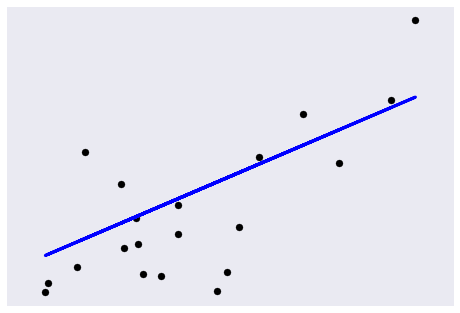

In [48]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test['Score'], diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Task 3

Now, we are going to use the K-Nearest Neighbors Classifier to decide if a blog post is popular or not. Please use the same popularity definition as in task 2, for this task. KNN is an instant-based classification which simply stores instances of the training data. Then, classification is computed from a majority vote of the nearest neighbors of each point.

1. Report the accuracy of your prediction for the test datasets a) blogData_test-2012.02.csv b) blogData_test-2012.03.csv ** (10 points) **
2. Provide a brief report explaining a) how did you define the nearest neighbors, b) interpretation of the KNN results, c) compare the results for the two test datasets and mention any interesting observations (5 points)

Total: ** (15 points) **

### Task 4

Finally, we are going to use the Decision Trees Classifier to decide if a blog post is popular or not. Please use the same popularity definition as in tasks 2,3, for this task. In order to construct a Decision Tree you will need to discretize some of the attributes.

1. Report the accuracy of your prediction for the test datasets a) blogData_test-2012.02.csv b) blogData_test-2012.03.csv ** (10 points) **
2. Provide a brief report explaining a) which attributes did you discretize and how, b) interpretation of the Decision Tree Classifier results, c) compare the results for the two test datasets and mention any interesting observations (5 points)

Total: ** (15 points) **